In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
import murraylab_tools.biotek as btek
import itertools

%matplotlib qt5
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from cycler import cycler
import numpy as np

mpl.font_manager._rebuild()
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

%matplotlib inline
%config InlineBackend.figure_f.ormats=['svg']

mpl.rc('axes', prop_cycle=(cycler('color', ['r', 'k', 'b','g','y','m','c']) ))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#mpl.rc('text', usetex=False)
#mpl.rc('text.latex', preamble=r'\usepackage{helvet}
#\renewcommand\familydefault{\sfdefault}\usepackage{sansmath}\sansmath')
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Roboto'], 
                 'serif': ['Roboto'],'weight':'normal'})

tw = 1.5
sns.set_style({"xtick.major.size": 3, "ytick.major.size": 3,
               "xtick.minor.size": 2, "ytick.minor.size": 2,
               'axes.labelsize': 16, 'axes.titlesize': 16,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})

mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)
mpl.rc('axes', linewidth=1.5)
mpl.rc('legend', fontsize=14)
mpl.rc('figure', figsize=(8.5,15))

This Jupyter notebook takes pre-processed flow-cytometry and biotek data (processed in 20190204_T7diff and 20190204_T7diff folders) and generates plots for Figure 4E and 4F.

In [3]:
# Load processed data
fracs_on_avgs = pd.read_csv('./T7diff_flow_fracs_on_avgs_stds.csv')
fracs_on_avgs= fracs_on_avgs.loc[fracs_on_avgs.plate<9,:]
YFP_ending_cumulative_avgs = pd.read_csv('./T7diff_biotek_cumulative_avgs_stds.csv')
YFP_ending_cumulative_avgs = YFP_ending_cumulative_avgs.loc[YFP_ending_cumulative_avgs.plate<9,:]

In [4]:
# Parameters for plotting
sal_concs = np.array([5,7.5,10])
las_conc = 3
color_palette = sns.color_palette()
alpha = 0.6
offsets = np.array([-0.3,-0.2,-0.1,0,0.1,0.2,0.3])/2
lw = 3
elw = 1.5

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


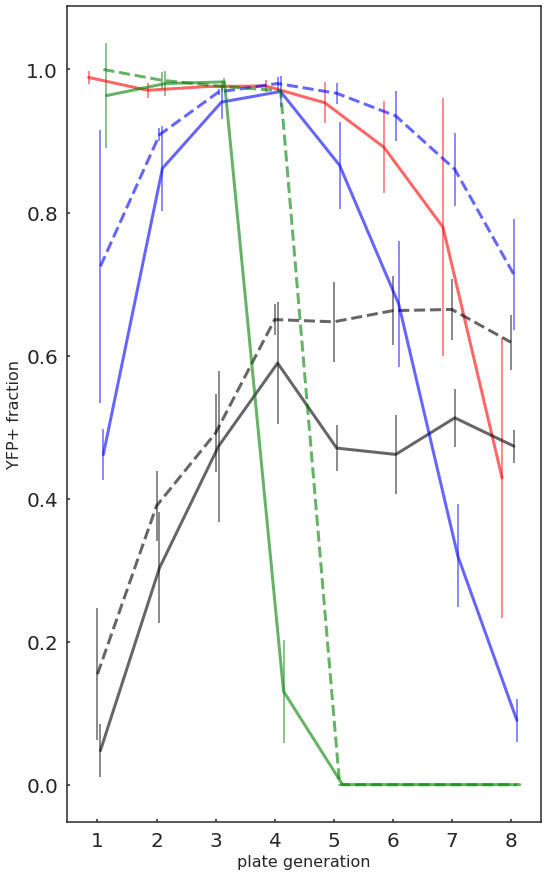

In [5]:
# Plots for 10uM IPTG flow data
iptg_conc = 10
fig, ax = plt.subplots()

x = fracs_on_avgs.loc[(fracs_on_avgs.strain=='ctrl') & \
                                    (fracs_on_avgs.iptg==iptg_conc),
                                   'plate'].values
y = fracs_on_avgs.loc[(fracs_on_avgs.strain=='ctrl') & \
                                (fracs_on_avgs.iptg==iptg_conc),
                               'fraction'].values
std = fracs_on_avgs.loc[(fracs_on_avgs.strain=='ctrl') & \
                                (fracs_on_avgs.iptg==iptg_conc),
                               'std'].values
ax.errorbar(x+offsets[0],y,std,color=color_palette[0],capsize=4,alpha=alpha,linewidth=lw,elinewidth=elw)
for j, sal_conc in enumerate(sal_concs):
    x = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='-'),
                                   'plate'].values
    y = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='-'),
                                   'fraction'].values
    std = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='-'),
                                   'std'].values
    ax.errorbar(x+offsets[2+j+1],y,std,color=color_palette[1 + j],linestyle='--',capsize=4,alpha=alpha,
                linewidth=lw,elinewidth=elw)

    x = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='+'),
                                   'plate'].values
    y = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='+'),
                                   'fraction'].values
    std = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='+'),
                                   'std'].values
    ax.errorbar(x+offsets[2+j+2],y,std,color=color_palette[1+j],capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)

ax.set_xticks(np.array([1,2,3,4,5,6,7,8]))
ax.set_xlabel('plate generation')
ax.set_ylabel('YFP+ fraction')
plt.savefig('./T7diff_10uM_flow.pdf',transparent=True)

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


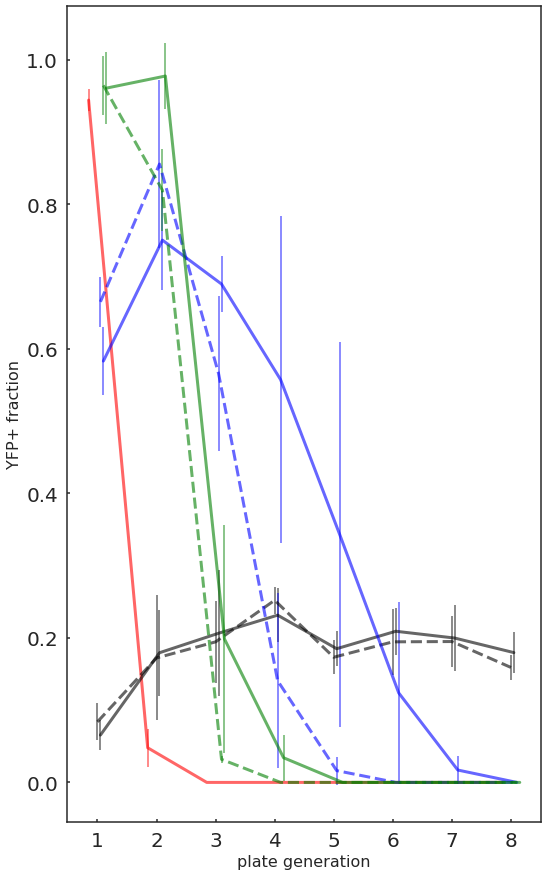

In [6]:
# Plots for 30uM flow data
iptg_conc = 30
fig, ax = plt.subplots()

x = fracs_on_avgs.loc[(fracs_on_avgs.strain=='ctrl') & \
                                    (fracs_on_avgs.iptg==iptg_conc),
                                   'plate'].values
y = fracs_on_avgs.loc[(fracs_on_avgs.strain=='ctrl') & \
                                (fracs_on_avgs.iptg==iptg_conc),
                               'fraction'].values
std = fracs_on_avgs.loc[(fracs_on_avgs.strain=='ctrl') & \
                                (fracs_on_avgs.iptg==iptg_conc),
                               'std'].values
ax.errorbar(x+offsets[0],y,std,color=color_palette[0],capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)
for j, sal_conc in enumerate(sal_concs):
    x = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='-'),
                                   'plate'].values
    y = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='-'),
                                   'fraction'].values
    std = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='-'),
                                   'std'].values
    ax.errorbar(x+offsets[2+j+1],y,std,color=color_palette[1 + j],linestyle='--',capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)

    x = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='+'),
                                   'plate'].values
    y = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='+'),
                                   'fraction'].values
    std = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='+'),
                                   'std'].values
    ax.errorbar(x+offsets[2+j+2],y,std,color=color_palette[1+j],capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)

ax.set_xticks(np.array([1,2,3,4,5,6,7,8]))
ax.set_xlabel('plate generation')
ax.set_ylabel('YFP+ fraction')
plt.savefig('./T7diff_30uM_flow.pdf',transparent=True)

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


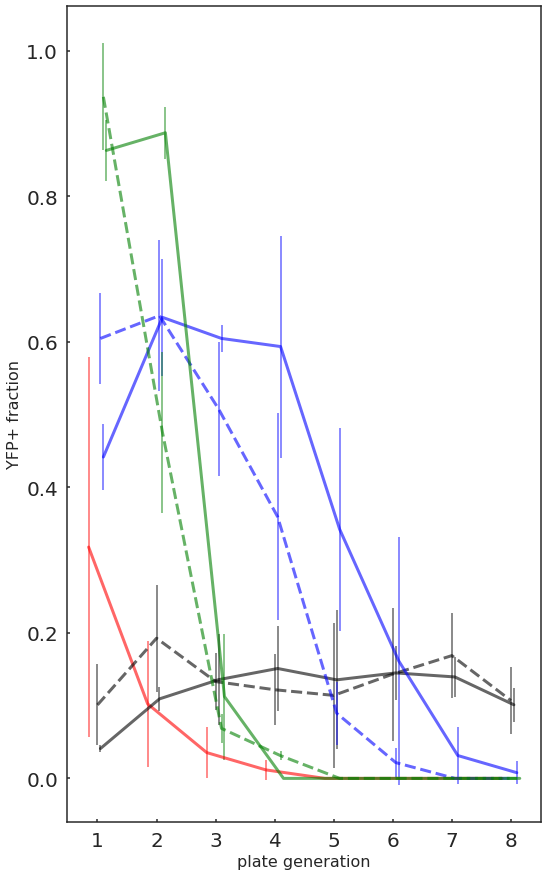

In [7]:
# Plots for 100uM flow data
iptg_conc = 100
fig, ax = plt.subplots()

x = fracs_on_avgs.loc[(fracs_on_avgs.strain=='ctrl') & \
                                    (fracs_on_avgs.iptg==iptg_conc),
                                   'plate'].values
y = fracs_on_avgs.loc[(fracs_on_avgs.strain=='ctrl') & \
                                (fracs_on_avgs.iptg==iptg_conc),
                               'fraction'].values
std = fracs_on_avgs.loc[(fracs_on_avgs.strain=='ctrl') & \
                                (fracs_on_avgs.iptg==iptg_conc),
                               'std'].values
ax.errorbar(x+offsets[0],y,std,color=color_palette[0],capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)
for j, sal_conc in enumerate(sal_concs):
    x = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='-'),
                                   'plate'].values
    y = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='-'),
                                   'fraction'].values
    std = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='-'),
                                   'std'].values
    ax.errorbar(x+offsets[2+j+1],y,std,color=color_palette[1 + j],linestyle='--',capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)

    x = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='+'),
                                   'plate'].values
    y = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='+'),
                                   'fraction'].values
    std = fracs_on_avgs.loc[(fracs_on_avgs.strain=='stem') & (fracs_on_avgs.sal==sal_conc) & \
                                 (fracs_on_avgs.las==las_conc) & (fracs_on_avgs.iptg==iptg_conc) & \
                             (fracs_on_avgs.chlor=='+'),
                                   'std'].values
    ax.errorbar(x+offsets[2+j+2],y,std,color=color_palette[1+j],capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)

ax.set_xticks(np.array([1,2,3,4,5,6,7,8]))
ax.set_xlabel('plate generation')
ax.set_ylabel('YFP+ fraction')
plt.savefig('./T7diff_100uM_flow.pdf',transparent=True)

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


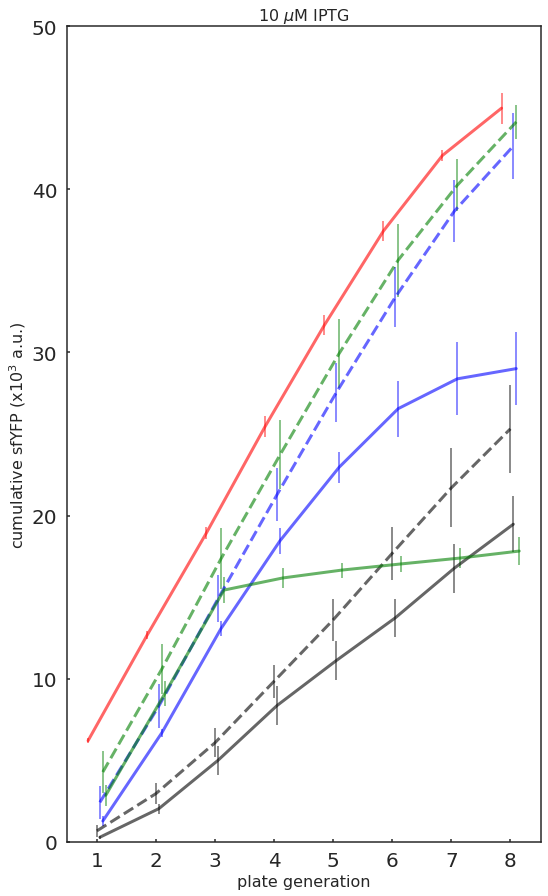

In [8]:
# Plots for 10uM cumalative production
iptg_conc = 10
fig, ax = plt.subplots()

x = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='ctrl') & \
                                    (YFP_ending_cumulative_avgs.iptg==iptg_conc),
                                   'plate'].values
y = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='ctrl') & \
                                (YFP_ending_cumulative_avgs.iptg==iptg_conc),
                               'Measurement'].values/1e3
std = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='ctrl') & \
                                (YFP_ending_cumulative_avgs.iptg==iptg_conc),
                               'std'].values/1e3
ax.errorbar(x+offsets[0],y,std,color=color_palette[0],capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)
for j, sal_conc in enumerate(sal_concs):
    x = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='-'),
                                   'plate'].values
    y = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='-'),
                                   'Measurement'].values/1e3
    std = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='-'),
                                   'std'].values/1e3
    ax.errorbar(x+offsets[2+j+1],y,std,color=color_palette[1 + j],linestyle='--',capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)

    x = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='+'),
                                   'plate'].values
    y = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='+'),
                                   'Measurement'].values/1e3
    std = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='+'),
                                   'std'].values/1e3
    ax.errorbar(x+offsets[2+j+2],y,std,color=color_palette[1+j],capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)

ax.set_ylim(0,50)
ax.set_xticks(np.array([1,2,3,4,5,6,7,8]))
ax.set_xlabel('plate generation')
ax.set_ylabel('cumulative sfYFP (x$10^3$ a.u.)')
ax.set_title('10 $\mu$M IPTG')
plt.savefig('./T7diff_10uM_cumulative_production.pdf',transparent=True)

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


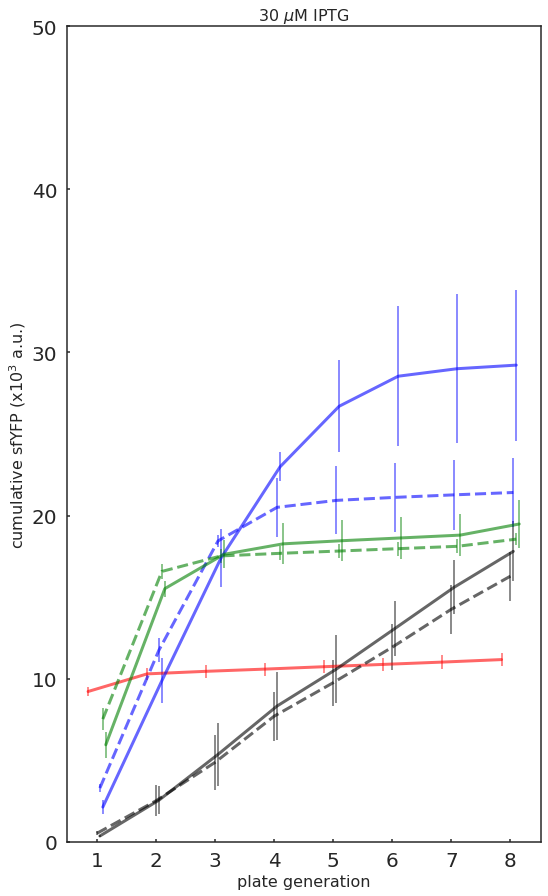

In [9]:
# Plots for 30uM cumalative production
iptg_conc = 30
fig, ax = plt.subplots()

x = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='ctrl') & \
                                    (YFP_ending_cumulative_avgs.iptg==iptg_conc),
                                   'plate'].values
y = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='ctrl') & \
                                (YFP_ending_cumulative_avgs.iptg==iptg_conc),
                               'Measurement'].values/1e3
std = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='ctrl') & \
                                (YFP_ending_cumulative_avgs.iptg==iptg_conc),
                               'std'].values/1e3
ax.errorbar(x+offsets[0],y,std,color=color_palette[0],capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)
for j, sal_conc in enumerate(sal_concs):
    x = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='-'),
                                   'plate'].values
    y = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='-'),
                                   'Measurement'].values/1e3
    std = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='-'),
                                   'std'].values/1e3
    ax.errorbar(x+offsets[2+j+1],y,std,color=color_palette[1 + j],linestyle='--',capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)

    x = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='+'),
                                   'plate'].values
    y = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='+'),
                                   'Measurement'].values/1e3
    std = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='+'),
                                   'std'].values/1e3
    ax.errorbar(x+offsets[2+j+2],y,std,color=color_palette[1+j],capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)
    
ax.set_ylim(0,50)
ax.set_xticks(np.array([1,2,3,4,5,6,7,8]))
ax.set_xlabel('plate generation')
ax.set_ylabel('cumulative sfYFP (x$10^3$ a.u.)')
ax.set_title('30 $\mu$M IPTG')
plt.savefig('./T7diff_30uM_cumulative_production.pdf',transparent=True)

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


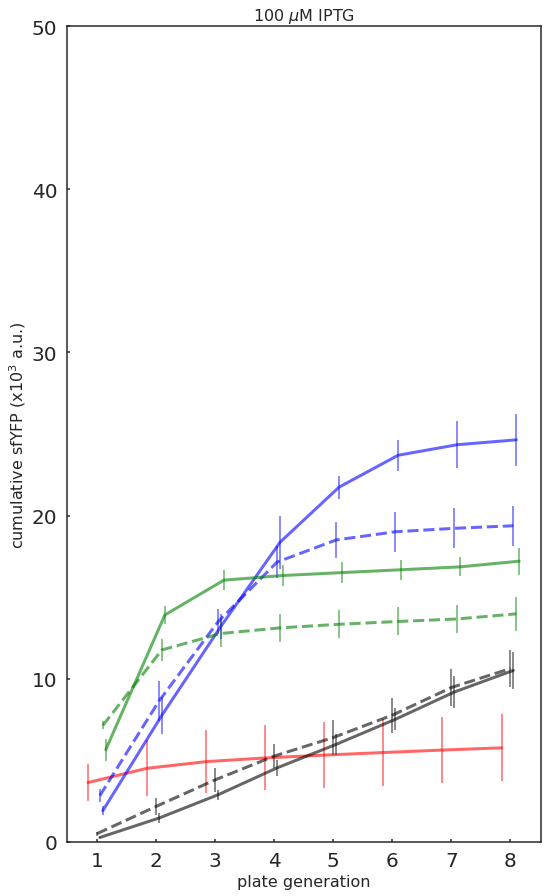

In [10]:
# Plots for 100uM cumalative production
iptg_conc = 100
fig, ax = plt.subplots()

x = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='ctrl') & \
                                    (YFP_ending_cumulative_avgs.iptg==iptg_conc),
                                   'plate'].values
y = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='ctrl') & \
                                (YFP_ending_cumulative_avgs.iptg==iptg_conc),
                               'Measurement'].values/1e3
std = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='ctrl') & \
                                (YFP_ending_cumulative_avgs.iptg==iptg_conc),
                               'std'].values/1e3
ax.errorbar(x+offsets[0],y,std,color=color_palette[0],capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)
for j, sal_conc in enumerate(sal_concs):
    x = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='-'),
                                   'plate'].values
    y = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='-'),
                                   'Measurement'].values/1e3
    std = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='-'),
                                   'std'].values/1e3
    ax.errorbar(x+offsets[2+j+1],y,std,color=color_palette[1 + j],linestyle='--',capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)

    x = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='+'),
                                   'plate'].values
    y = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='+'),
                                   'Measurement'].values/1e3
    std = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='+'),
                                   'std'].values/1e3
    ax.errorbar(x+offsets[2+j+2],y,std,color=color_palette[1+j],capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)

ax.set_ylim(0,50)
ax.set_xticks(np.array([1,2,3,4,5,6,7,8]))
ax.set_xlabel('plate generation')
ax.set_ylabel('cumulative sfYFP (x$10^3$ a.u.)')
ax.set_title('100 $\mu$M IPTG')
plt.savefig('./T7diff_100uM_cumulative_production.pdf',transparent=True)

Now just generates plots with legends that we can crop to make the figures.

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


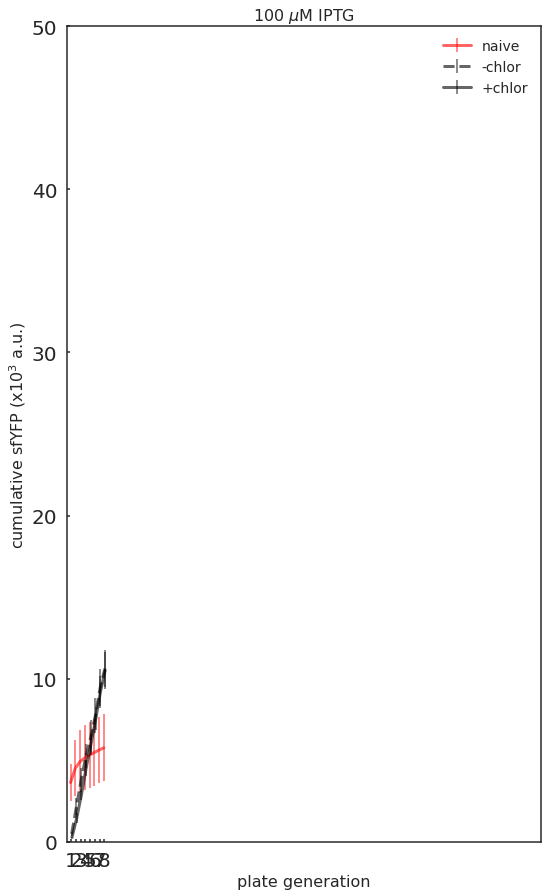

In [11]:
# generate plots with legends to crop from
iptg_conc = 100
fig, ax = plt.subplots()
sal_conc = 5

x = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='ctrl') & \
                                    (YFP_ending_cumulative_avgs.iptg==iptg_conc),
                                   'plate'].values
y = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='ctrl') & \
                                (YFP_ending_cumulative_avgs.iptg==iptg_conc),
                               'Measurement'].values/1e3
std = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='ctrl') & \
                                (YFP_ending_cumulative_avgs.iptg==iptg_conc),
                               'std'].values/1e3
ax.errorbar(x+offsets[0],y,std,color=color_palette[0],capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)

x = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                             (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                         (YFP_ending_cumulative_avgs.chlor=='-'),
                               'plate'].values
y = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                             (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                         (YFP_ending_cumulative_avgs.chlor=='-'),
                               'Measurement'].values/1e3
std = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                             (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                         (YFP_ending_cumulative_avgs.chlor=='-'),
                               'std'].values/1e3
ax.errorbar(x+offsets[2+j+1],y,std,color='black',linestyle='--',capsize=4,alpha=alpha,linewidth=lw,
            elinewidth=elw)

x = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                             (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                         (YFP_ending_cumulative_avgs.chlor=='+'),
                               'plate'].values
y = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                             (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                         (YFP_ending_cumulative_avgs.chlor=='+'),
                               'Measurement'].values/1e3
std = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                             (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                         (YFP_ending_cumulative_avgs.chlor=='+'),
                               'std'].values/1e3
ax.errorbar(x+offsets[2+j+2],y,std,color='black',capsize=4,alpha=alpha,linewidth=lw,
            elinewidth=elw)

ax.legend(['naive','-chlor','+chlor'])
ax.set_ylim(0,50)
ax.set_xlim(0,100)
ax.set_xticks(np.array([1,2,3,4,5,6,7,8]))
ax.set_xlabel('plate generation')
ax.set_ylabel('cumulative sfYFP (x$10^3$ a.u.)')
ax.set_title('100 $\mu$M IPTG')
plt.savefig('./T7diff_legend1.pdf',transparent=True)

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


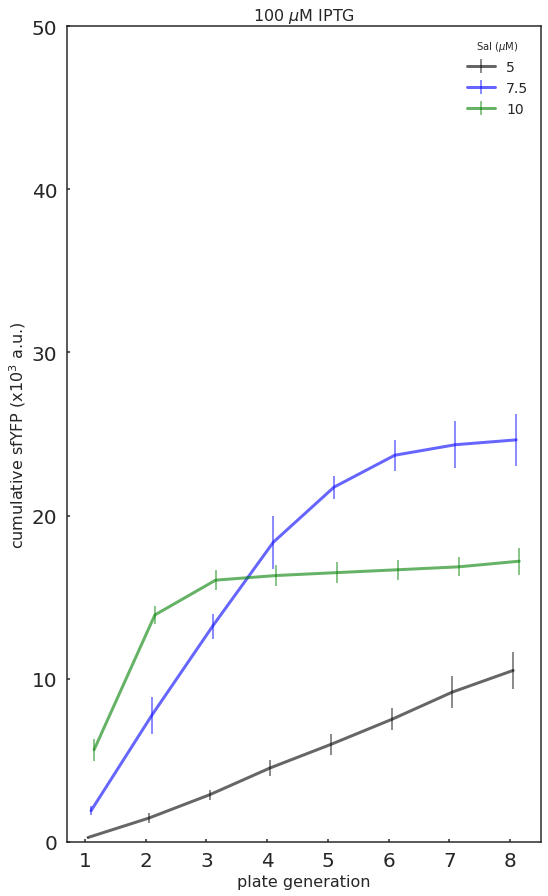

In [12]:
iptg_conc = 100
fig, ax = plt.subplots()

for j, sal_conc in enumerate(sal_concs):
    x = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='+'),
                                   'plate'].values
    y = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='+'),
                                   'Measurement'].values/1e3
    std = YFP_ending_cumulative_avgs.loc[(YFP_ending_cumulative_avgs.strain=='stem') & (YFP_ending_cumulative_avgs.sal==sal_conc) & \
                                 (YFP_ending_cumulative_avgs.las==las_conc) & (YFP_ending_cumulative_avgs.iptg==iptg_conc) & \
                             (YFP_ending_cumulative_avgs.chlor=='+'),
                                   'std'].values/1e3
    ax.errorbar(x+offsets[2+j+2],y,std,color=color_palette[1+j],capsize=4,alpha=alpha,linewidth=lw,
                elinewidth=elw)

ax.set_ylim(0,50)
ax.legend(['5','7.5','10'],title='Sal ($\mu$M)')
ax.set_xticks(np.array([1,2,3,4,5,6,7,8]))
ax.set_xlabel('plate generation')
ax.set_ylabel('cumulative sfYFP (x$10^3$ a.u.)')
ax.set_title('100 $\mu$M IPTG')
plt.savefig('./T7diff_legend2.pdf',transparent=True)

Now just generate some tables summarizing the results to make quantitative comparisons:

In [15]:
YFP_final_cum_avgs = YFP_ending_cumulative_avgs.loc[YFP_ending_cumulative_avgs.plate==8,['strain','sal','las','iptg','chlor','Measurement','std']]

In [16]:
iptg_concs = np.array([0,10,30,100])
YFP_final_cum_avgs['fraction_naive'] = -1
for i, iptg_conc in enumerate(iptg_concs):
    YFP_final_cum_avgs.loc[YFP_final_cum_avgs.iptg==iptg_conc,'fraction_naive'] = \
    YFP_final_cum_avgs.loc[YFP_final_cum_avgs.iptg==iptg_conc,'Measurement'] /\
    YFP_final_cum_avgs.loc[(YFP_final_cum_avgs.iptg==iptg_conc) & (YFP_final_cum_avgs.strain=='ctrl'),'Measurement'].values

In [17]:
YFP_final_cum_avgs['Measurement'] = YFP_final_cum_avgs['Measurement'].round()
YFP_final_cum_avgs['std'] = YFP_final_cum_avgs['std'].round()
YFP_final_cum_avgs['fraction_naive'] = YFP_final_cum_avgs['fraction_naive'].round(2)

In [18]:
YFP_final_cum_avgs

,strain,sal,las,iptg,chlor,Measurement,std,fraction_naive
336,HCA_1,0.0,0,0,-,122.0,2.0,0.14
337,HCA_2,0.0,0,0,-,119.0,14.0,0.14
338,HCA_3,0.0,0,0,-,131.0,3.0,0.15
339,LNL,0.0,0,0,-,21.0,1.0,0.02
340,ctrl,0.0,0,0,-,878.0,49.0,1.00
341,ctrl,0.0,0,10,-,44980.0,958.0,1.00
342,ctrl,0.0,0,30,-,11167.0,414.0,1.00
343,ctrl,0.0,0,100,-,5756.0,2061.0,1.00
344,stem,5.0,3,0,+,595.0,37.0,0.68
345,stem,5.0,3,0,-,862.0,14.0,0.98


In [19]:
YFP_final_cum_avgs = YFP_final_cum_avgs.sort_values(['strain','iptg','chlor','sal'])

In [20]:
YFP_final_cum_avgs.to_csv('T7_cumulative_producion_final.csv')